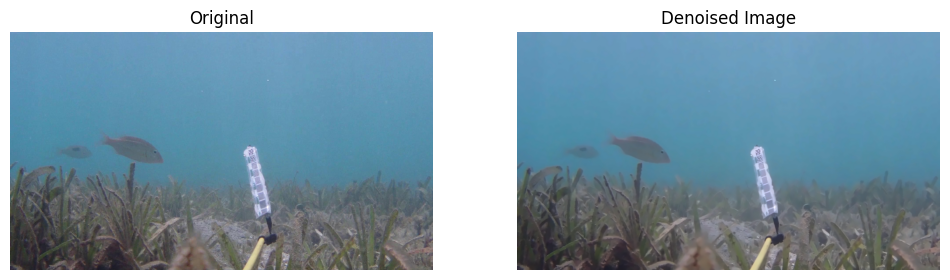

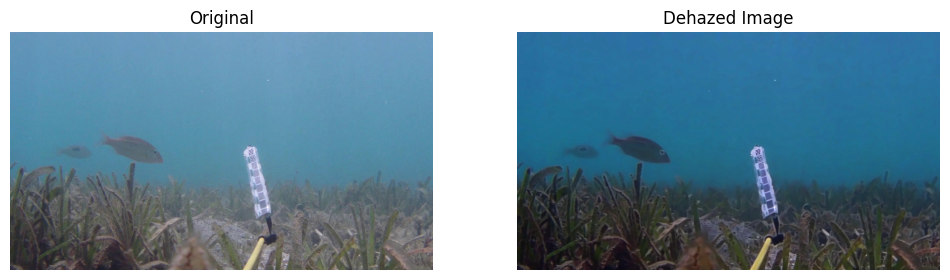

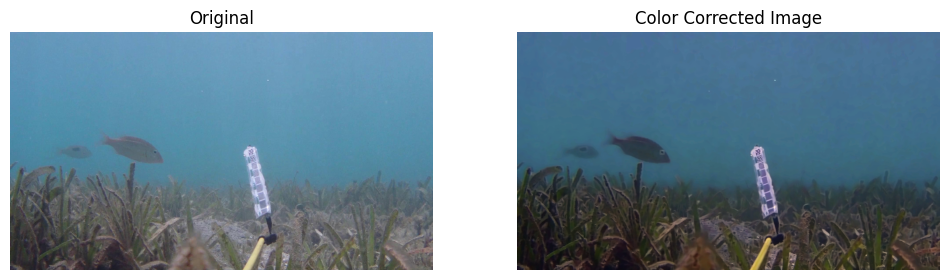

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_side_by_side(original, processed, title1="Original", title2="Processed"):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')
    plt.show()

# Load the underwater image
image_path = 'image.jpg'  # Update this with your image path
image = cv2.imread(image_path)

# 1. Adjustable Denoising
def denoise_image(image, h=10):
    return cv2.fastNlMeansDenoisingColored(image, None, h, h, 7, 21)

denoised = denoise_image(image, h=5)
display_side_by_side(image, denoised, title2="Denoised Image")

# 2. Adjustable Dehazing
def dark_channel(image, window_size=15):
    min_channel = np.min(image, axis=2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (window_size, window_size))
    return cv2.erode(min_channel, kernel)

def dehaze(image, omega=0.8, t0=0.1, window_size=15):
    dark = dark_channel(image, window_size)
    A = np.max(image)
    transmission = 1 - omega * (dark / A)
    transmission = np.clip(transmission, t0, 1)
    transmission = cv2.merge([transmission] * 3)
    dehazed = (image - A * (1 - transmission)) / transmission
    return np.clip(dehazed, 0, 255).astype(np.uint8)

dehazed = dehaze(denoised, omega=0.7)
display_side_by_side(image, dehazed, title2="Dehazed Image")

# 3. Adjustable White Balance
def white_balance(image, correction_factor=1.1):
    result = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    avg_a = np.mean(result[:, :, 1])
    avg_b = np.mean(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * correction_factor)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * correction_factor)
    return cv2.cvtColor(result, cv2.COLOR_LAB2BGR)

color_corrected = white_balance(dehazed, correction_factor=1.0)
display_side_by_side(image, color_corrected, title2="Color Corrected Image")
